# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

El siguiente dataframe contiene las compañías exceptuando la que tiene más ventas:

In [ ]:
df_without_domain_company = df.sort_values('Sales', ascending=0)[1:]
df_without_domain_company

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


In [ ]:
# Promedio de ventas
mean_sales = df_without_domain_company['Sales'].mean()
mean_sales

46602.416666666664

In [ ]:
# Compañía con menos ventas y su relación con el promedio
df_without_domain_company.tail(1)['Sales']/mean_sales

24    0.356033
Name: Sales, dtype: float64

In [ ]:
# Compañía con más ventas y su relación con el promedio
df_without_domain_company.head(1)['Sales']/mean_sales

1    2.468477
Name: Sales, dtype: float64

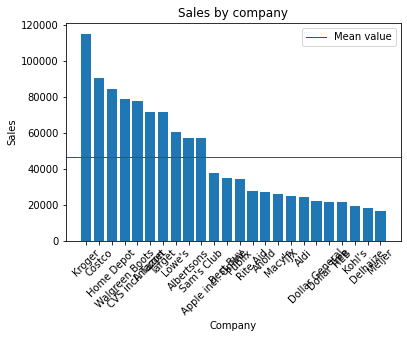

In [ ]:
x = df_without_domain_company['Company']
y = df_without_domain_company['Sales']
mean_sales = df_without_domain_company['Sales'].mean()

plt.bar(x, y)
plt.title('Sales by company')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='45') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.axhline(y=mean_sales,linewidth=1, color='r', label='Mean value')
plt.legend()

plt.show()

### Resultado
- El promedio de ventas, sin contar a la compañía dominante (compañía con más ventas), es US$ 46602 millones.
- La compañía Kroger tiene 2.5 veces más ventas que el promedio.
- La compañia Meijer tiene un 35% aprox. de ventas respecto al promedio.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

<AxesSubplot:>

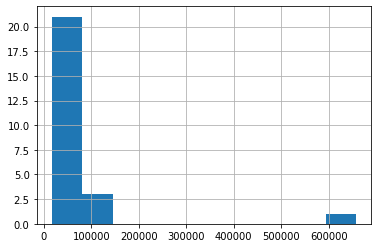

In [ ]:
df['Sales'].hist()

<AxesSubplot:>

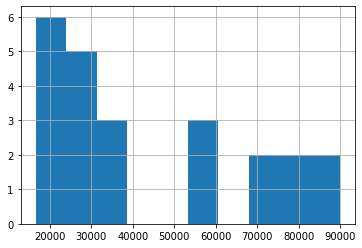

In [ ]:
df_2 = df[df['Sales']<100000]
df_2['Sales'].hist()

## Resultado
La mayoría de compañías generó entre \US$ 19000 y US$ 30000 millones en ventas.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

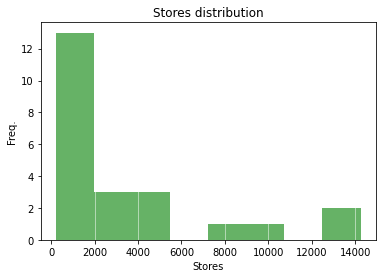

In [ ]:
plt.hist(df['Stores'], 8, facecolor='g', alpha=0.6)
plt.title('Stores distribution')
plt.xlabel('Stores')
plt.ylabel('Freq.')
#plt.xticks(15)
plt.grid(color='white', lw = 0.5, axis='x')

plt.show()

Basado en la anterior distribución se encuentra que la mayoría de las compañías tienen entre 0 y 2000 tiendas.

In [ ]:
# Filtro del dataframe con las compañías que tiene 2000 o menos tiendas
df_stores = df[df['Stores'] <= 2000]
df_stores['Stores'].mean()

1087.7692307692307

## Resultado
La mayoría de las compañías tienen 1088 tiendas aproximadamente.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

<AxesSubplot:xlabel='Stores', ylabel='Sales'>

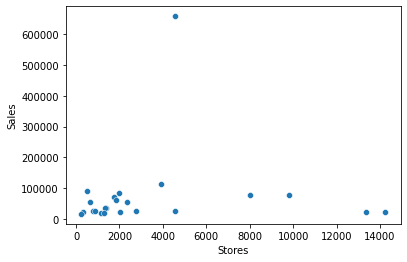

In [ ]:
sns.scatterplot(data=df, x='Stores', y='Sales')

## Resultado

No hay relación entre la cantidad de tiendas y las ventas que una compañía tiene.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
# dataframe ordenado por ventas
df_sorted_by_sales = df.sort_values('Sales', ascending=0)

In [ ]:
# Cálculo del rango de ventas:
min_sales = int(df['Sales'].tail(1))
max_sales = int(df['Sales'].head(1))
range_sales = max_sales - min_sales

range_sales

641527

## Resultado
El rango entre las ventas es de US$ 641527 millones. 

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
# Top 5 de las compañías que tienen más tiendas
df_sort_by_stores_top5 = df.sort_values('Stores', ascending=0).head(5)
df_sort_by_stores_top5

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [ ]:
# Top 5 de las compañías que tienen más ventas
df_sorted_by_sales_top5 = df_sorted_by_sales.head(5)
df_sorted_by_sales_top5

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
# Cálculo de la intersección entre los dos anteriores dataframes
# Cálculo de la segunda parte de la pregunta
df_result = pd.concat([df_sorted_by_sales_top5, df_sort_by_stores_top5], axis=1, join='inner')
display(df_result)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
# Función que permite unir dos dataframes en base a una columna en común, sin repetir registros (rows)
# df1, df2, dataframes
# key, nombre de la columna en común str
def join_df_unique(df1, df2, key):
    full_df = df1

    key_names_df1 = df1[key]
    key_names_df1 = list(key_names_df1)  # Cambio del tipo de dato a lista

    for row in range(len(df2.index)+1):
        new_row = df2.iloc[row-1][key]
        if new_row not in key_names_df1:
            full_df = full_df.append(df2[(row-1):row])
            key_names_df1.append(new_row)

    return full_df

In [ ]:
df_join = join_df_unique(df_sorted_by_sales_top5, df_sort_by_stores_top5, 'Company')

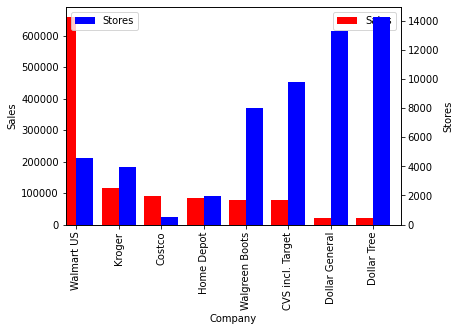

In [ ]:
df_join = df_join.sort_values('Sales', ascending=0)

# Creación de un gráfico de barras con doble eje Y (para mejorar la visualización de las dos variables)
fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.4

df_join.plot(x="Company", y="Sales", kind='bar', color='red', ax=ax, width=width, position=1)
df_join.plot(x="Company", y="Stores", kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Sales')
ax2.set_ylabel('Stores')

plt.show()


## Resultado
Las 5 empresas que tienen más tiendas físicas son: Dollar Tree, Dollar General, CVS incl. Target, Walgreen Boots y Walmart US.

De las anteriores empresas, Walmart US y Walgreen Boots están dentro de las 5 empresas que más ventas tienen, del anterior gráfico:
- Walmart US primero en ventas (barra roja) y quinto en cantidad de tiendas (barra azul).
- Walgreen Boots quinto en ventas (barra roja) y cuarto en cantidad de tiendas (barra azul).

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

<AxesSubplot:xlabel='Category'>

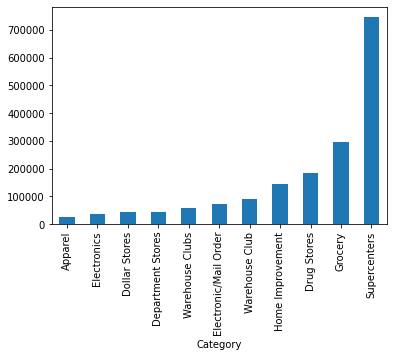

In [ ]:
# Suma de las ventas en cada una de las categorías
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='bar')

In [ ]:
df_categ = df.groupby('Category')['Sales'].sum().sort_values()
n_categ = len(df_categ)
df_categ[n_categ-2]/df_categ[n_categ-1] # Relación entre las dos categorías con mayores ventas

0.3983864199732142

## Resultado
La categoría que generó más ventas es Supercenter con un 39% de diferencia respecto a la categoría Grocery.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
# Obtención de la relación entre ventas y número de tiendas
df['Sales/Stores'] =df['Sales']/df['Stores']
df_sort_by_SalesStores = df.sort_values('Sales/Stores', ascending=0)
df_sort_by_SalesStores.head(3)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305


<AxesSubplot:xlabel='Company', ylabel='Sales/Stores'>

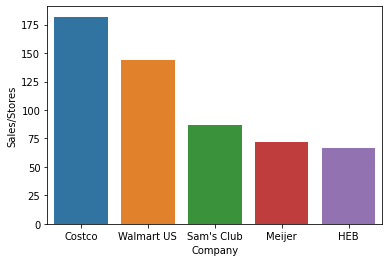

In [ ]:
sns.barplot(x = 'Company', y = 'Sales/Stores', data = df_sort_by_SalesStores.head(5))

Comparación de ventas en promedio por tienda:

<AxesSubplot:xlabel='Company', ylabel='Sales/Avg. Store'>

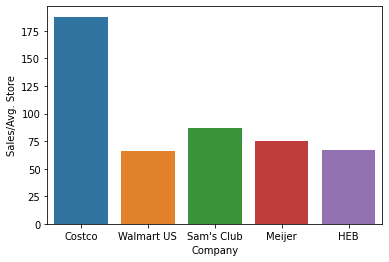

In [ ]:
sns.barplot(x = 'Company', y = 'Sales/Avg. Store', data = df_sort_by_SalesStores.head(5))

In [ ]:
delta_sales_by_store = df_sort_by_SalesStores.iloc[0]['Sales/Avg. Store'] / df_sort_by_SalesStores.iloc[1]['Sales/Avg. Store']
delta_sales_by_store

2.8605697965348234

Costco maneja un 2.9 aprox. más número de ventas por tienda comparado con Walmart US. En general maneja mejores ventas por tienda respecto a las demás compañías, alrededor del doble.

## Resultados
Costco es la compañía con mejor relación ventas vs. número de tiendas.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
''' Creación de la columna Store type con los valores Virtual y Physical dependiendo de la 
 existencia de tiendas '''
df.loc[df['Stores'].isnull(),'Store type'] = 'Virtual'
df.loc[df['Stores'].notnull(), 'Store type'] = 'Physical'

In [ ]:
# Compañías que venden exclusivamente online
df_virtual = df[df['Store type']=='Virtual']
df_virtual

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Store type
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN,Virtual
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN,Virtual


In [ ]:
df_physical = df[df['Store type']=='Physical']

# Top 3 de las compañías que tienen tiendas físicas con mejores ventas
df_physical.sort_values('Sales', ascending=0).head(3) 

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Store type
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597,Physical
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,Physical
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152,Physical


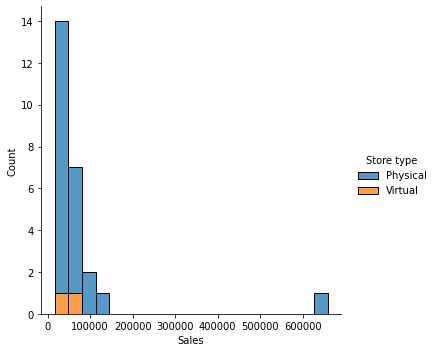

In [ ]:
# Comparación de las tiendas exclusivamente Online con las que tienen tiendas físicas
sns.displot(df, x='Sales', hue = 'Store type', multiple='stack')

## Resultado
Dos compañías venden de forma exclusivamente online: Amazon y Apple incl. Online.

Las ventas de la compañías de ventas virtuales son inferiores a las que tienen tiendas físicas. 9 veces más ventas.

## III. Tus propias preguntas

### 10. ¿Existe una relación entre las ventas y el promedio de ventas por tienda en las compañías?

<AxesSubplot:xlabel='Sales/Avg. Store', ylabel='Sales'>

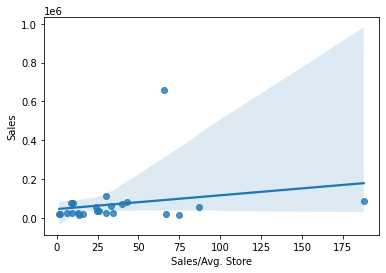

In [ ]:
sns.regplot(x='Sales/Avg. Store', y='Sales', data=df, fit_reg=True)

<AxesSubplot:xlabel='Stores', ylabel='Sales'>

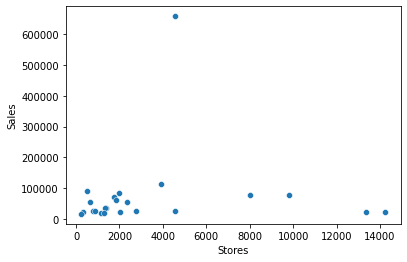

In [ ]:
''' Scatter plot entre tiendas y ventas, no se tiene una 
relación o tendencia de subida como en la anterior gráfica ''' 
sns.scatterplot(x='Stores', y='Sales', data=df)

## Resultado

Se tiene una leve tendencia a tener mejores ventas en total cuando cada tienda aumenta su promedio de ventas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=078e13b1-22d3-4d9e-975b-aa88afd82525' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>